In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [8]:
# Checking the dataset

import os

# Setting the number of classes

no_of_classes = 7

folder_path = "/kaggle/input/fer2013/"

print("\nTraining dataset\n")
for expression in os.listdir(os.path.join(folder_path, "train")):
    print(str(len(os.listdir(os.path.join(folder_path, "train", expression)))) + " " + expression + " images")

print("\nTest dataset\n")
for expression in os.listdir(os.path.join(folder_path, "test")):
    print(str(len(os.listdir(os.path.join(folder_path, "test", expression)))) + " " + expression + " images")



Training dataset

3171 surprise images
4097 fear images
3995 angry images
4965 neutral images
4830 sad images
436 disgust images
7215 happy images

Test dataset

831 surprise images
1024 fear images
958 angry images
1233 neutral images
1247 sad images
111 disgust images
1774 happy images


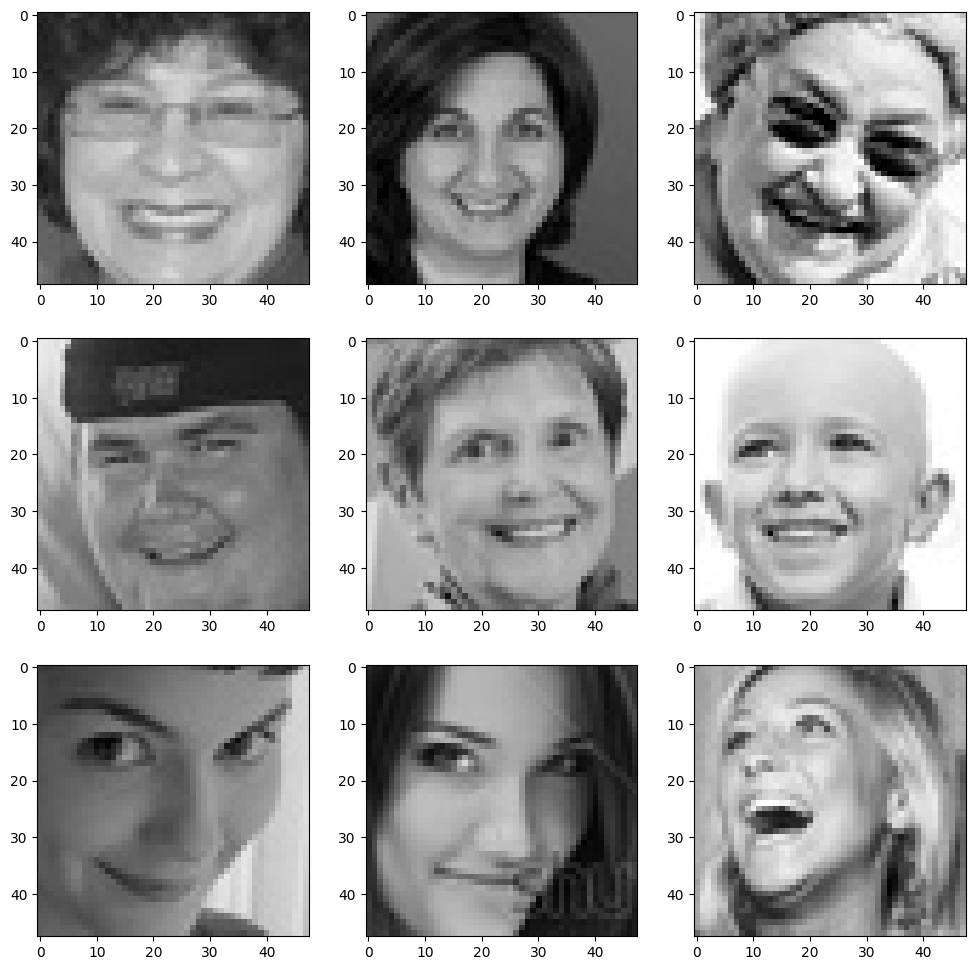

In [9]:
# Exploaring the images

img_size = 48

expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path + "train/" + expression +"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(img_size, img_size))
    plt.imshow(img)   
plt.show()

In [10]:
# Making Training and Validation Data

batch_size = 128

datagen_train = ImageDataGenerator(horizontal_flip=True, rescale=1.0/255.0)
train_generator = datagen_train.flow_from_directory(folder_path + "train/",
                                                    target_size=(img_size, img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True, rescale=1.0/255.0)
validation_generator = datagen_validation.flow_from_directory(folder_path + "test/",
                                                               target_size=(img_size, img_size),
                                                               color_mode="grayscale",
                                                               batch_size=batch_size,
                                                               class_mode='categorical',
                                                               shuffle=False)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
# Creating a model

from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential()

# Input layer
model.add(Input(shape=(48, 48, 1)))

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Output layer
model.add(Dense(no_of_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [12]:
# Fitting the Model with Training and Validation Data

checkpoint = ModelCheckpoint("./model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=callbacks_list
)

Epoch 1/48


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2539 - loss: 1.9438
Epoch 1: val_accuracy improved from -inf to 0.22377, saving model to ./model.keras
224/224 ━━━━━━━━━━━━━━━━━━━━ 883s 4s/step - accuracy: 0.2541 - loss: 1.9431 - val_accuracy: 0.2238 - val_loss: 2.1636 - learning_rate: 0.0010
Epoch 2/48
  1/224 ━━━━━━━━━━━━━━━━━━━━ 13:37 4s/step - accuracy: 0.3516 - loss: 1.6343
Epoch 2: val_accuracy did not improve from 0.22377
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 508us/step - accuracy: 0.3516 - loss: 1.6343 - val_accuracy: 0.0000e+00 - val_loss: 4.4566 - learning_rate: 0.0010
Epoch 3/48


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4202 - loss: 1.4975
Epoch 3: val_accuracy improved from 0.22377 to 0.36621, saving model to ./model.keras
224/224 ━━━━━━━━━━━━━━━━━━━━ 866s 4s/step - accuracy: 0.4203 - loss: 1.4973 - val_accuracy: 0.3662 - val_loss: 1.7015 - learning_rate: 0.0010
Epoch 4/48
  1/224 ━━━━━━━━━━━━━━━━━━━━ 13:29 4s/step - accuracy: 0.5156 - loss: 1.1904
Epoch 4: val_accuracy did not improve from 0.36621
224/224 ━━━━━━━━━━━━━━━━━━━━ 38s 153ms/step - accuracy: 0.5156 - loss: 1.1904 - val_accuracy: 0.0000e+00 - val_loss: 2.8537 - learning_rate: 0.0010
Epoch 5/48
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4948 - loss: 1.3124
Epoch 5: val_accuracy improved from 0.36621 to 0.50921, saving model to ./model.keras
224/224 ━━━━━━━━━━━━━━━━━━━━ 862s 4s/step - accuracy: 0.4948 - loss: 1.3123 - val_accuracy: 0.5092 - val_loss: 1.2702 - learning_rate: 0.0010
Epoch 6/48
  1/224 ━━━━━━━━━━━━━━━━━━━━ 13:12 4s/step - accuracy: 0.3750 - loss: 1.4434
Epoch 6: v

In [15]:
model.save('my_trained_model.keras')

In [13]:
from tensorflow.keras.models import load_model
loaded_model = load_model('my_trained_model.keras')


/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 54 variables whereas the saved optimizer has 2 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from IPython.display import FileLink

FileLink(r'/kaggle/working/my_trained_model.keras')


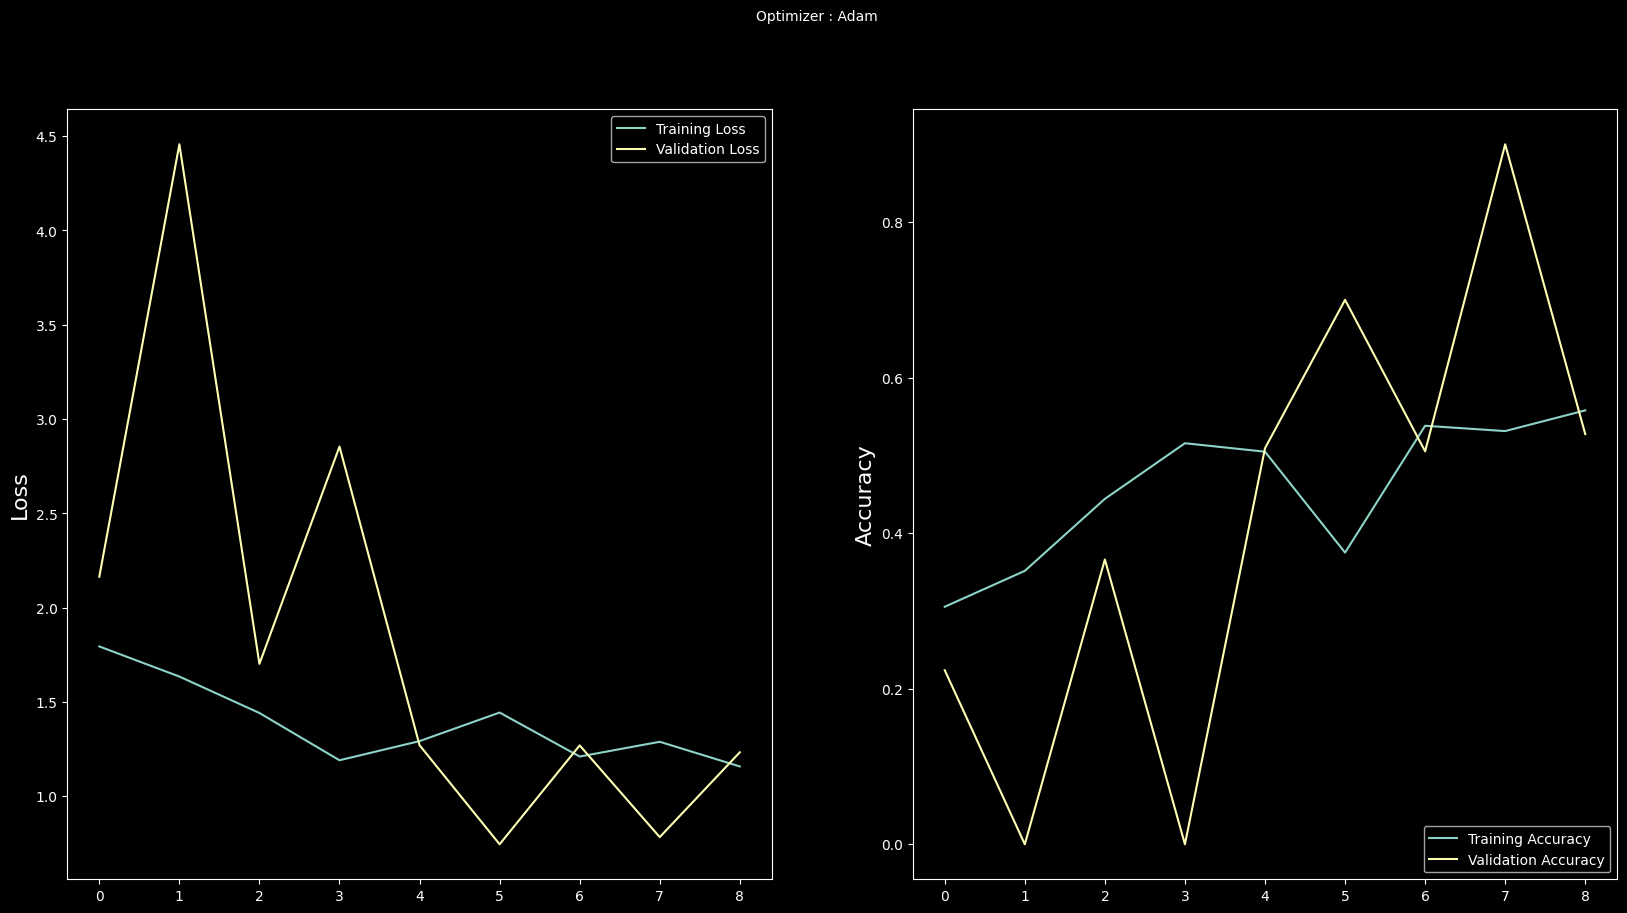

In [15]:
#Plotting Accuracy & Loss

plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

1. Utmaningar under arbetet samt hur man hanterat dem.

Jag lär mig fortfarande Python, så det är en utmaning för mig. Sedan under träningen av modellen har jag inte lyckats få bättre accuracy än 55%. Jag har testat och justerat modellen många gånger, men det blev bara ett sämre resultat. 
Utmaning var också att få klassificering av ansikten funka i OpenCV, för jag fick endast Sad som resultat. Då fick jag göra rescale i imagegenerator och det hjälpte.


2. Vilket betyd anser jag att jag ska få och varför.

Jag hoppas att jag kan få G. 

3. Tips jag hade gett mig i början av kursen nu när man slutfört den.

Avsätta ännu mera tid för arbetet.


